# Clustering Jugadores de Campo

In [1]:
# Paquetería
import pandas as pd

## K-Means
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from matplotlib.ticker import MaxNLocator
from sklearn.decomposition import PCA
import plotly.express as px

# dbscan
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score


# Jerarquica
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Gausian Mixture Models
from sklearn.mixture import GaussianMixture


In [2]:
# Funciones a usar

def apply_one_hot_encoding(df):
    """
    Aplica la codificación One-Hot a todas las columnas no numéricas de un DataFrame.

    Parámetros:
        df (pandas.DataFrame): DataFrame a transformar.

    Retorna:
        pandas.DataFrame: DataFrame con codificación One-Hot aplicada a las columnas no numéricas.
    """
    # Identificar las columnas no numéricas
    non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

    # Aplicar One-Hot Encoding
    df_encoded = pd.get_dummies(df, columns=non_numeric_columns)

    return df_encoded

# Uso de la función:
# Supongamos que df es tu DataFrame que ya has cargado.
# df_encoded = apply_one_hot_encoding(df)


In [3]:
Data_Teams = pd.read_csv('C:/Users/rsier/Desktop/MASTERS/LaSalle - MUDS/TFM/Data/Def_Data/Teams_data.csv')
Data_Teams.head(5)

,Season_End_Year,Squad,Comp,Age_Generales,Num_Players_Generales,Mn_per_Start_Starts_Generales,Mn_per_Sub_Subs_Generales,unSub_Subs_Generales,PPM_Team.Success_Generales,Fld_Generales,...,Att3rd_Tackles_percent_Defensa,Num_Players_Porteria,GA90_Porteria,PSxG_per_SoT_Expected_Porteria,CS_percent_Porteria,Att_Launched_Porteria,Opp_Crosses_Porteria,AvgLen_Goal_Porteria,AvgLen_Passes_Porteria,CK_Goals_Porteria
0,2018,Alavés,La Liga,25.5,30,85,20,154,1.24,522,...,0.103989,2,1.32,0.25,31.6,786,657,56.7,43.4,7
1,2018,Amiens,Ligue 1,27.5,30,85,20,155,1.18,459,...,0.106383,2,1.11,0.27,28.9,930,653,58.8,43.9,3
2,2018,Angers,Ligue 1,27.1,27,84,22,153,1.08,436,...,0.107413,3,1.37,0.26,15.8,625,538,56.3,38.6,3
3,2018,Arsenal,Premier League,26.8,30,85,0,165,1.66,377,...,0.134831,2,1.34,0.29,34.2,460,508,47.3,34.4,6
4,2018,Atalanta,Serie A,25.7,25,82,0,313,1.58,465,...,0.107586,3,1.03,0.32,28.9,464,487,52.4,34.5,4


## 1. K-Means

In [4]:
Data_Teams_1 = Data_Teams.copy()

In [5]:
# Seleccionar características
X_1_without_OHE = Data_Teams_1.iloc[:, 3:60]
X_1 = apply_one_hot_encoding(X_1_without_OHE)

# Seleccionar la columna de etiquetas
y_1 = Data_Teams_1.iloc[:, 0:2]

Encontrar el número ideal de grupos para dividir los datos es una etapa básica en cualquier algoritmo no supervisado. Una de las técnicas más comunes para calcular este valor ideal de k es el método del codo.

In [6]:
sse = [] #SUM OF SQUARED ERROR

for k in range(1,20):
    km = KMeans(n_clusters=k, random_state=410)
    km.fit(X_1)
    sse.append(km.inertia_)

c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

Trazar el gráfico del codo para encontrar el número óptimo de grupos

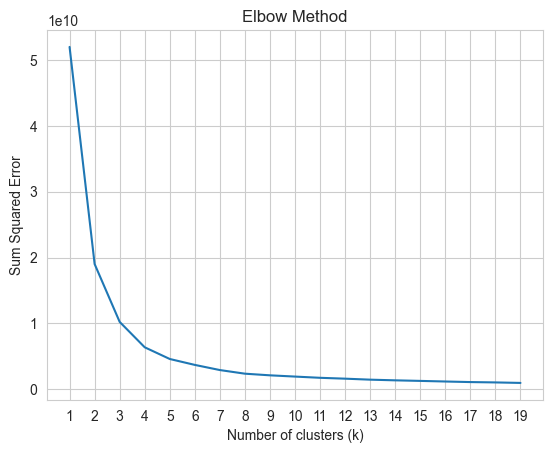

In [7]:
sns.set_style("whitegrid")

# Suponiendo que 'sse' es tu lista o array de Sum Squared Error
g = sns.lineplot(x=range(1, 20), y=sse)

g.set(xlabel="Number of clusters (k)",
      ylabel="Sum Squared Error",
      title='Elbow Method')

# Configurar los ticks del eje x para mostrar todos los números enteros en el rango
plt.xticks(range(1, 20))

plt.show()

Calculamos el "silhouette scores" para decretear el menor numero de cluster con menor indice.

c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

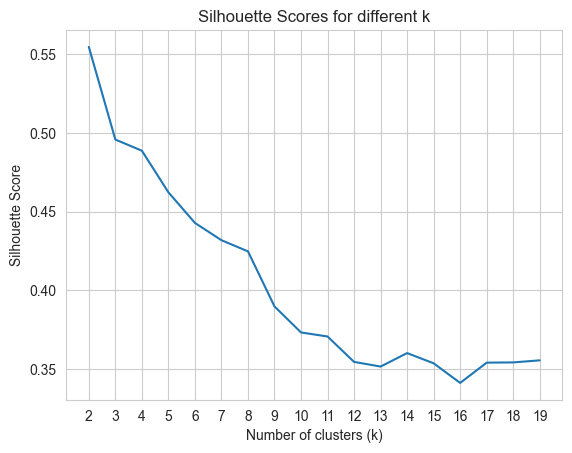

In [8]:
silhouette_scores = []

for k in range(2, 20):  # Silhouette score no se puede calcular para k = 1
    km = KMeans(n_clusters=k, random_state=410)
    labels = km.fit_predict(X_1)
    score = silhouette_score(X_1, labels)
    silhouette_scores.append(score)

sns.lineplot(x=range(2, 20), y=silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.xticks(range(2, 20))
plt.show()

In [9]:
# Construya el modelo de agrupación en clústeres de Kmeans
kmeans = KMeans(n_clusters = 8, random_state = 410)
kmeans.fit(X_1)

# Predecir el grupo de clústeres:
pred = kmeans.fit_predict(X_1)


c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rsier\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


¿Coinciden los clústers con las posiciones?

In [10]:
clusters_KMeans = pd.Series(pred)
# Resetear índices en df si has hecho operaciones que alteran sus filas
Data_Teams_1.reset_index(drop=True, inplace=True)
# Asegurarte de que pred_series también tiene un índice que coincide con df
clusters_KMeans = pd.Series(pred, index=Data_Teams_1.index)

Data_Teams_1['Cluster - Kmeans'] = clusters_KMeans
# Data_Teams[["Season_End_Year", "Squad", "Comp", "Player","Nation", "Pos", "Pos_2", "Cluster - Kmeans"]]

In [11]:
tabla_frecuencias = pd.crosstab(index=Data_Teams_1['Comp'], columns=Data_Teams_1['Cluster - Kmeans'], margins=True, margins_name='Total')

# Imprimir la tabla de frecuencias
print(tabla_frecuencias)

Cluster - Kmeans    0   1   2    3   4   5   6    7  Total
Comp                                                      
Bundesliga         32   0   9   27   2  19   8   11    108
La Liga            18   2  13   25  11  17   5   29    120
Ligue 1            14   3  21   27  11   4  13   27    120
Premier League     23   7  14   24   8  10  16   18    120
Serie A            15   0  21   25   5   1  24   29    120
Total             102  12  78  128  37  51  66  114    588


C:\Users\rsier\AppData\Local\Temp\ipykernel_21420\1870584428.py:11: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  ax = sns.countplot(x=var, hue='Cluster - Kmeans', data=Data_Teams_1, palette=palette)


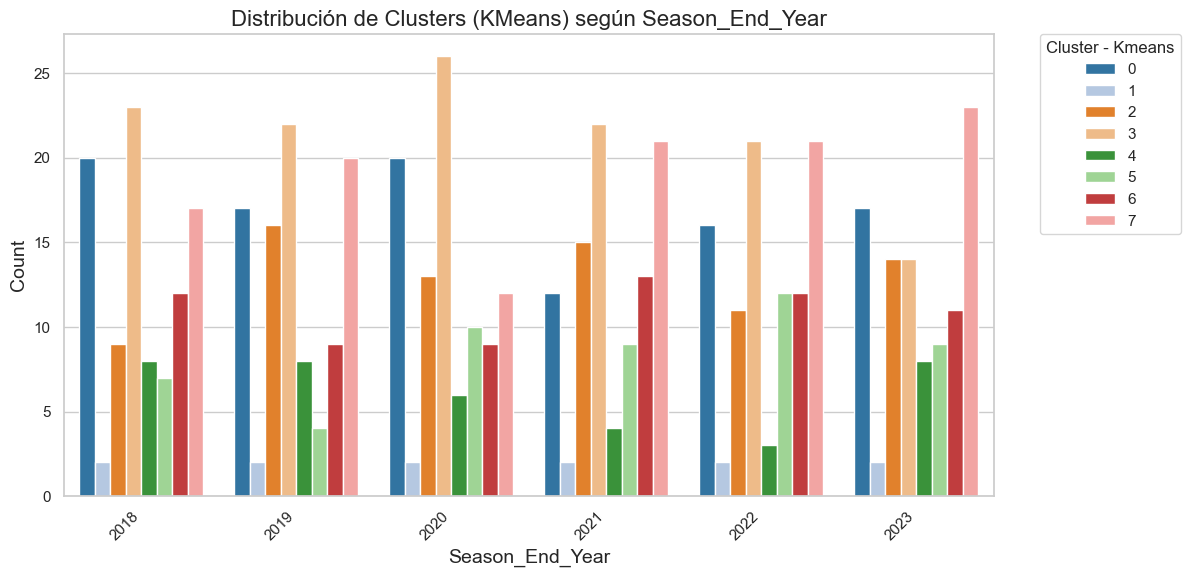

C:\Users\rsier\AppData\Local\Temp\ipykernel_21420\1870584428.py:11: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  ax = sns.countplot(x=var, hue='Cluster - Kmeans', data=Data_Teams_1, palette=palette)


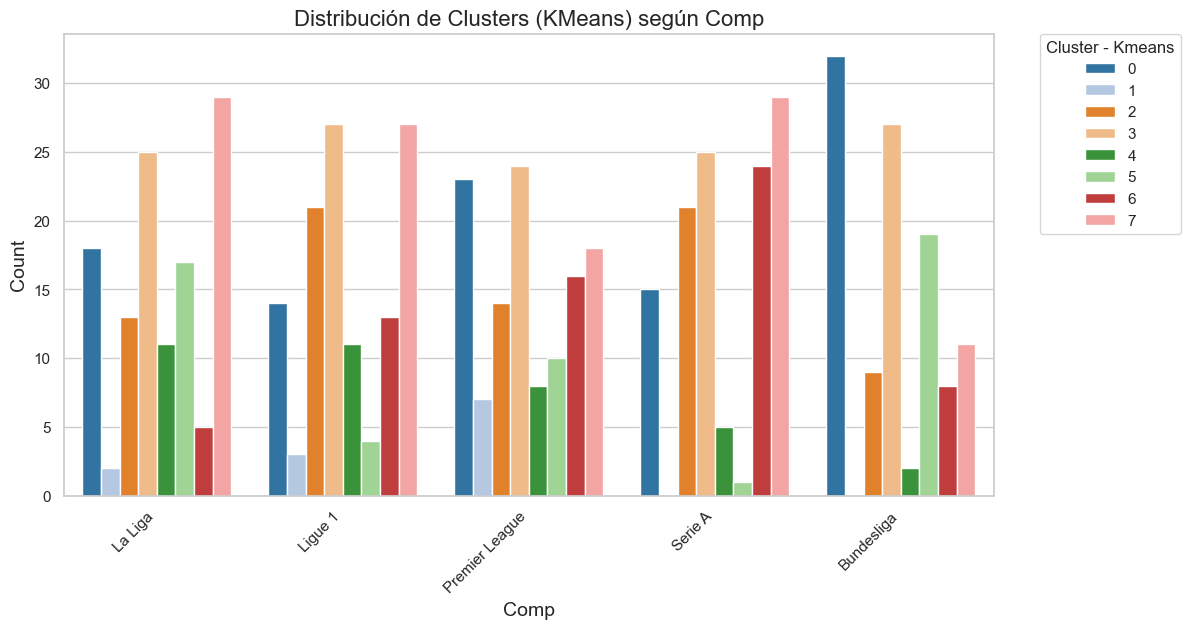

In [12]:
# Configurar el estilo y la paleta de colores
sns.set(style="whitegrid")
# Usando la paleta 'tab20' que proporciona hasta 20 colores diferenciados
palette = sns.color_palette("tab20", 9)  # Específicamente pedir 9 colores

# Lista de variables categóricas
variables = ['Season_End_Year', 'Comp']

for var in variables:
    plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura para mejor visualización
    ax = sns.countplot(x=var, hue='Cluster - Kmeans', data=Data_Teams_1, palette=palette)
    plt.title(f'Distribución de Clusters (KMeans) según {var}', fontsize=16)
    plt.xticks(rotation=45, ha="right")  # Rotación con alineación a la derecha para mejor visualización
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Cluster - Kmeans', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Mover la leyenda fuera del gráfico
    plt.show()

In [13]:
# Data_Teams

from IPython.display import display, HTML

# Asegurar que el DataFrame se muestre completamente en la salida de Jupyter
pd.set_option('display.max_rows', None)

# Agrupar por 'Cluster' y seleccionar 10 jugadores de cada uno, incluyendo el año de final de temporada
players_by_cluster = Data_Teams_1.groupby('Cluster - Kmeans').apply(lambda x: x[['Squad', 'Season_End_Year']].sample(n=min(10, len(x)))).reset_index()

# Eliminar el nivel adicional de índice introducido por sample
players_by_cluster = players_by_cluster.drop('level_1', axis=1)

players_by_cluster

,Cluster - Kmeans,Squad,Season_End_Year
0,0,Rennes,2020
1,0,Sheffield Utd,2021
2,0,Hamburger SV,2018
3,0,Caen,2019
4,0,Köln,2020
5,0,Metz,2018
6,0,Nantes,2018
7,0,Augsburg,2021
8,0,Wolfsburg,2023
9,0,Freiburg,2021


In [14]:
clusters_KMeans = Data_Teams_1['Cluster - Kmeans']
comp_KMeans = Data_Teams_1['Comp']
years_KMeans = Data_Teams_1['Season_End_Year']
teams_KMeans = Data_Teams_1['Squad']

# Escalar los datos
scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X_1)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_1_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster - Kmeans'] = clusters_KMeans
pca_df['Comp'] = comp_KMeans
pca_df['Season_End_Year'] = years_KMeans
pca_df['Team'] = teams_KMeans

# Visualizar los clusters
fig = px.scatter(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    color='Cluster - Kmeans',
    color_continuous_scale=px.colors.qualitative.D3,  # Usa una paleta que pueda distinguir bien entre 15 clusters
    hover_data=['Comp', 'Season_End_Year', 'Team'],  # Datos que aparecerán en el tooltip
    title='Visualization of Clusters using PCA'
)

fig.update_traces(marker=dict(size=8))  # Ajusta el tamaño de los puntos
fig.update_layout(legend=dict(title='Cluster - Kmeans', orientation="h", y=1.1, xanchor="center", x=0.5))  # Mejorar posición de la leyenda
fig.show()

## 2. DBSCAN

In [15]:
Data_Teams_2 = Data_Teams.copy()

In [16]:
# Seleccionar características sin aplicar one-hot encoding para no alterar la estructura espacial con variables categóricas
X_2_without_OHE = Data_Teams_2.iloc[:, 3:60]
X_2 = apply_one_hot_encoding(X_2_without_OHE)

# Asegurarse de que se están utilizando los datos escalados
scaler = StandardScaler()
X_2_scaled = scaler.fit_transform(X_2)  # Asumimos datos no categóricos para simplificar

# Seleccionar la columna de etiquetas
y_2 = Data_Teams_2.iloc[:, 0:2]

Modelado de datos utilizando DBSCAN 

In [17]:
# Asumiendo que X_scaled es tu conjunto de datos escalado
neighbors = NearestNeighbors(n_neighbors=2)  # 2 porque incluye el propio punto
neighbors_fit = neighbors.fit(X_2_scaled)
distances, indices = neighbors_fit.kneighbors(X_2_scaled)


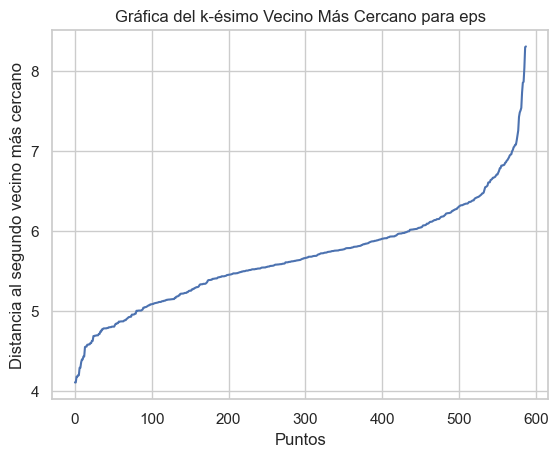

In [18]:
# Ordenar y graficar las distancias
sorted_distances = np.sort(distances[:, 1])  # el índice 1 es para el segundo vecino más cercano
plt.plot(sorted_distances)
plt.xlabel('Puntos')
plt.ylabel('Distancia al segundo vecino más cercano')
plt.title('Gráfica del k-ésimo Vecino Más Cercano para eps')
plt.show()

La elección de eps ideal generalmente ocurre en un punto justo antes de este aumento pronunciado, donde la distancia al segundo vecino más cercano aún es relativamente baja pero comienza a aumentar. Este punto a menudo se describe como el "codo" de la curva.

Probar eps cerca de 4, dado que cae antes del aumento extremo pero parece estar en la fase donde las distancias ya están comenzando a aumentar. Este valor puede ser un buen equilibrio entre capturar suficientes puntos en clusters y no agrupar demasiado los datos.

Ajustes Finos: Ajusta este valor ligeramente hacia arriba o hacia abajo para ver cómo afecta la configuración de los clusters. Por ejemplo, puedes probar valores en el rango de 3.5 a 4.5 para ver si alguno mejora la configuración de los clusters.

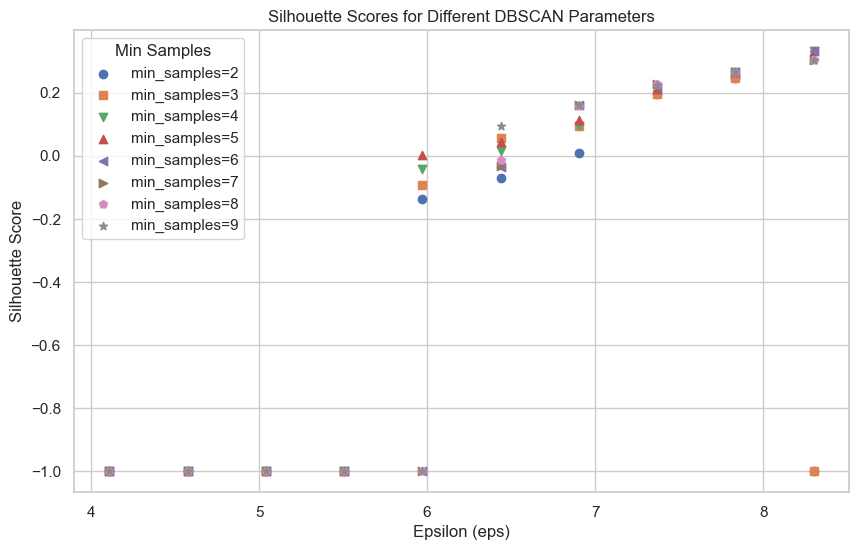

In [19]:
# Suponiendo que ya tienes X_2_scaled que es tu conjunto de datos escalado

# Definir rangos para los parámetros
eps_values = np.linspace(sorted_distances[0], sorted_distances[-1], num=10)
min_samples_values = range(2, 10)  # Rango típico para min_samples

# Almacenar los resultados
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_2_scaled)
        labels = db.labels_
        # Calcular Silhouette Score sólo si hay más de un cluster y menos de la mitad de puntos no son ruido
        if len(set(labels)) > 1 and np.count_nonzero(labels != -1) > len(labels) / 2:
            silhouette_avg = silhouette_score(X_2_scaled, labels)
            results.append((eps, min_samples, silhouette_avg))
        else:
            results.append((eps, min_samples, -1))  # Indicador de clustering no válido o inefectivo

# Convertir resultados a DataFrame para fácil visualización
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])

# Preparar la visualización con matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupar por min_samples para diferentes marcadores
markers = ['o', 's', 'v', '^', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd']
for i, group in enumerate(results_df.groupby('min_samples')):
    group_data = group[1]
    ax.scatter(group_data['eps'], group_data['silhouette_score'], marker=markers[i % len(markers)], label=f'min_samples={group[0]}')

ax.set_xlabel('Epsilon (eps)')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Different DBSCAN Parameters')
ax.legend(title='Min Samples', loc='best')
ax.grid(True)

plt.show()


In [20]:
# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_2_scaled)

# Aplicar DBSCAN con los parámetros seleccionados
db = DBSCAN(eps=9, min_samples=9).fit(principal_components)
labels = db.labels_

# Número de clusters y puntos marcados como ruido
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Número de clusters formados: {n_clusters_}")
print(f"Puntos considerados ruido: {n_noise_}")

Data_Teams_2['Cluster - DBSCAN'] = labels
clusters_DBSCAN = Data_Teams_2['Cluster - DBSCAN']
comp_DBSCAN = Data_Teams_2['Comp']
years_DBSCAN = Data_Teams_2['Season_End_Year']
teams_DBSCAN = Data_Teams_2['Squad']

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster - DBSCAN'] = clusters_DBSCAN
pca_df['Comp'] = comp_DBSCAN
pca_df['Season_End_Year'] = years_DBSCAN
pca_df['Team'] = teams_DBSCAN

# Mapa de colores personalizado para los clusters y ruido
unique_clusters = pd.unique(pca_df['Cluster - DBSCAN'])
colors = px.colors.qualitative.Plotly[:len(unique_clusters)]
color_discrete_map = {cluster: color for cluster, color in zip(unique_clusters, colors)}
if -1 in color_discrete_map:
    color_discrete_map[-1] = 'grey'  # Color especial para el ruido

# Visualizar los clusters
fig = px.scatter(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    color='Cluster - DBSCAN',
    color_discrete_map=color_discrete_map,
    hover_data=['Comp', 'Season_End_Year', 'Team'],
    title='Visualization of Clusters using PCA'
)

fig.update_traces(marker=dict(size=8))
fig.update_layout(legend=dict(title='Cluster - DBSCAN', orientation="h", y=1.1, xanchor="center", x=0.5))
fig.show()

Número de clusters formados: 1
Puntos considerados ruido: 0


## 3. Jerárquico

In [21]:
Data_Teams_3 = Data_Teams.copy()

In [22]:
# Seleccionar características
X_3_without_OHE = Data_Teams_3.iloc[:, 3:60]
X_3 = apply_one_hot_encoding(X_3_without_OHE)

# Escalar los datos
scaler = StandardScaler()
X_3_scaled = scaler.fit_transform(X_3)

# Seleccionar la columna de etiquetas
y_3 = Data_Teams.iloc[:, 0:2]

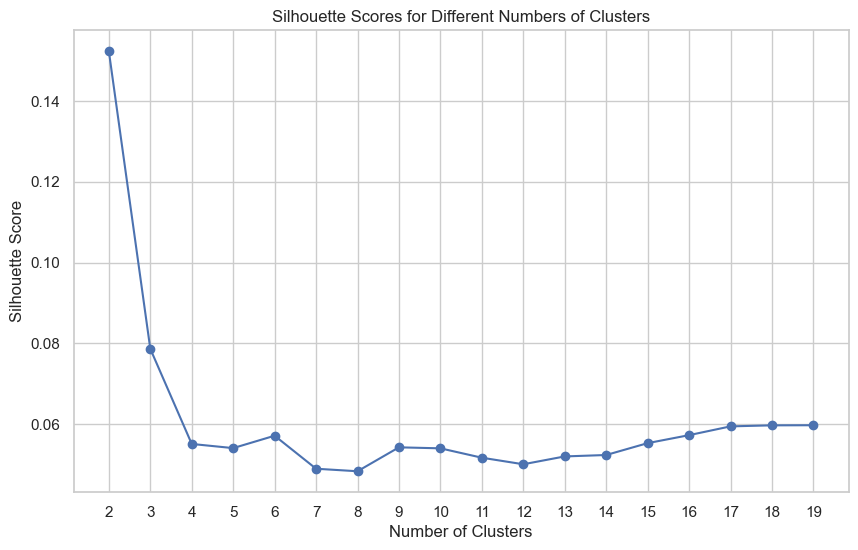

In [23]:
# Suponiendo que X_3_scaled ya está definido y escalado

# Determinar el número óptimo de clusters con Silhouette Score
range_n_clusters = list(range(2, 20))  # Evaluar de 2 a 19 clusters
silhouette_avg = []

for n_clusters in range_n_clusters:
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X_3_scaled)
    cluster_labels = clustering.labels_
    # Calcular el Silhouette Score solo si hay más de un cluster
    if len(set(cluster_labels)) > 1:
        silhouette_avg.append(silhouette_score(X_3_scaled, cluster_labels))
    else:
        silhouette_avg.append(None)  # En caso de que todos los puntos queden en un solo cluster

# Gráfica de Silhouette Scores por número de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Configurar ticks del eje X para que solo muestren números enteros
plt.xticks(range_n_clusters)  # Esto asegura que solo se muestren los números enteros en el rango definido

plt.show()

In [24]:
num_clusters = 7

# Realizar la clusterización con el número óptimo de clusters
clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(X_3_scaled)

# Agregar las etiquetas de los clusters al DataFrame original
Data_Teams_3['Cluster - HAglomerative'] = clustering.labels_

# Ahora 'Data_Teams_3' tiene una nueva columna llamada 'Cluster_Labels' con las etiquetas de cluster
# Data_Teams_3['Player', 'Squad', 'Season_End_Year', 'Cluster - HAglomerative'] # Mostrar las primeras filas para verificar

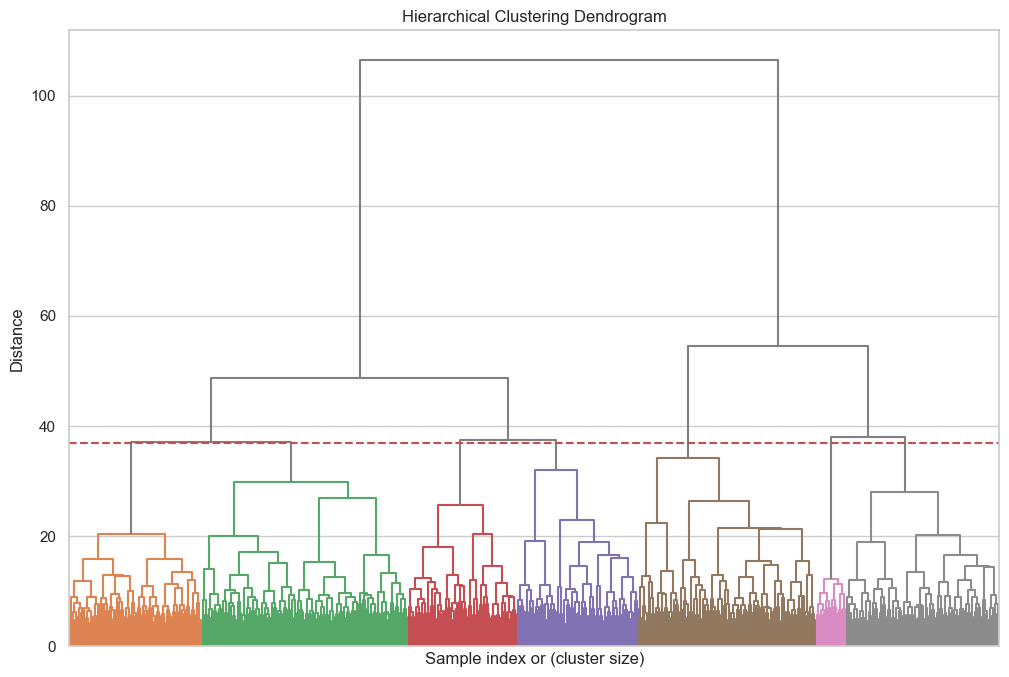

In [25]:
import matplotlib.colors as mcolors

# Generar el enlace para el dendrograma
linked = linkage(X_3_scaled, method='ward')

# Visualizar el dendrograma con el umbral correcto para 14 clusters
plt.figure(figsize=(12, 8))

dendrogram(
    linked,
    orientation='top',
    labels=np.array(Data_Teams_3['Squad']),
    distance_sort='ascending',
    show_leaf_counts=True,
    color_threshold=37,  # Usar el threshold calculado
    above_threshold_color='gray',
    # color_discrete_sequence=px.colors.qualitative.Dark24[0:15],
    no_labels=True  # Omitir etiquetas para claridad visual
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.axhline(y=37, color='r', linestyle='--')  # Dibuja la línea de corte
plt.show()

In [26]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_3_scaled)

# Preparar el DataFrame para la visualización
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = Data_Teams_3['Cluster - HAglomerative']
df_pca['Comp'] = Data_Teams_3['Comp']
df_pca['Season_End_Year'] = Data_Teams_3['Season_End_Year']
df_pca['Squad'] = Data_Teams_3['Squad']

# Crear el gráfico interactivo utilizando la misma paleta de colores
fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', hover_data=['Comp', 'Season_End_Year', 'Squad'],
                 title='PCA Projection of Hierarchical Clustering Results', color_continuous_scale=px.colors.qualitative.T10)
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig.show()

In [27]:
import os

Data_Teams["Cluster"] = Data_Teams_3['Cluster - HAglomerative']

# Paso 2: Especificar el directorio y el nombre del archivo
directorio = 'C:/Users/rsier/Desktop/MASTERS/LaSalle - MUDS/TFM/Data/Def_Data/Clustering_Data/'
nombre_archivo = 'Teams_data_clustered.csv'
ruta_completa = os.path.join(directorio, nombre_archivo)

# Paso 3: Exportar el DataFrame a un archivo CSV
Data_Teams.to_csv(ruta_completa, index=False)

In [35]:
Data_Teams.head(10)

,Season_End_Year,Squad,Comp,Age_Generales,Num_Players_Generales,Mn_per_Start_Starts_Generales,Mn_per_Sub_Subs_Generales,unSub_Subs_Generales,PPM_Team.Success_Generales,Fld_Generales,...,Num_Players_Porteria,GA90_Porteria,PSxG_per_SoT_Expected_Porteria,CS_percent_Porteria,Att_Launched_Porteria,Opp_Crosses_Porteria,AvgLen_Goal_Porteria,AvgLen_Passes_Porteria,CK_Goals_Porteria,Cluster
0,2018,Alavés,La Liga,25.5,30,85,20,154,1.24,522,...,2,1.32,0.25,31.6,786,657,56.7,43.4,7,5
1,2018,Amiens,Ligue 1,27.5,30,85,20,155,1.18,459,...,2,1.11,0.27,28.9,930,653,58.8,43.9,3,6
2,2018,Angers,Ligue 1,27.1,27,84,22,153,1.08,436,...,3,1.37,0.26,15.8,625,538,56.3,38.6,3,6
3,2018,Arsenal,Premier League,26.8,30,85,0,165,1.66,377,...,2,1.34,0.29,34.2,460,508,47.3,34.4,6,0
4,2018,Atalanta,Serie A,25.7,25,82,0,313,1.58,465,...,3,1.03,0.32,28.9,464,487,52.4,34.5,4,0
5,2018,Athletic Club,La Liga,26.7,26,85,22,160,1.13,487,...,2,1.29,0.28,28.9,840,525,58.8,43.6,5,5
6,2018,Atlético Madrid,La Liga,26.6,26,83,24,156,2.08,481,...,2,0.58,0.23,60.5,581,550,54.5,42.4,2,0
7,2018,Augsburg,Bundesliga,26.6,27,85,0,143,1.21,411,...,2,1.35,0.26,26.5,578,471,44.2,37.8,11,1
8,2018,Barcelona,La Liga,27.7,25,84,21,155,2.45,520,...,2,0.76,0.26,50.0,310,411,41.3,27.9,1,0
9,2018,Bayern Munich,Bundesliga,27.4,28,85,0,134,2.47,413,...,3,0.82,0.26,47.1,369,280,39.2,32.5,2,0


## 4. Gausian Mixture Models

In [28]:
Data_Teams_4 = Data_Teams.copy()

In [29]:
# Seleccionar características
X_4_without_OHE = Data_Teams_4.iloc[:, 3:60]
X_4 = apply_one_hot_encoding(X_4_without_OHE)


# Escalar los datos
scaler = StandardScaler()
X_4_scaled = scaler.fit_transform(X_4)

# Seleccionar la columna de etiquetas
y_4 = Data_Teams_4.iloc[:, 0:2]

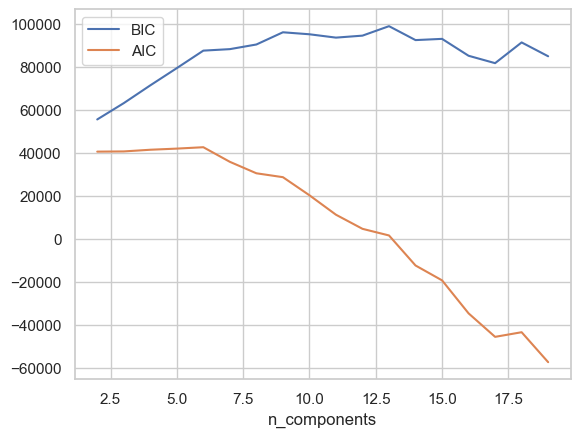

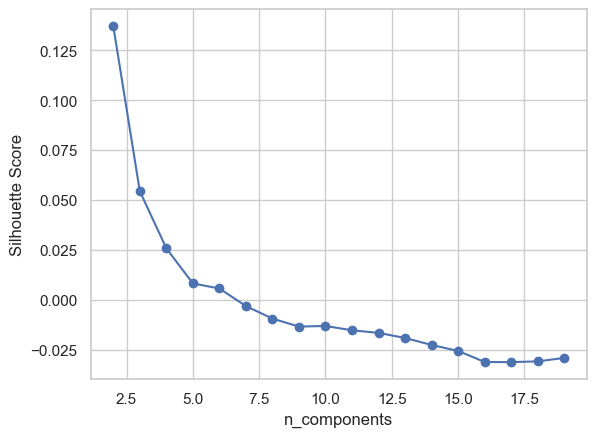

In [30]:
# Evaluando el número óptimo de componentes
n_components = np.arange(2, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_4_scaled) for n in n_components]

plt.plot(n_components, [m.bic(X_4_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_4_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

silhouette_scores = [silhouette_score(X_4_scaled, GaussianMixture(n, covariance_type='full', random_state=0).fit_predict(X_4))
                     for n in n_components]
plt.plot(n_components, silhouette_scores, "bo-")
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')
plt.show()

In [31]:
optimal_n = 6  # Reemplaza con el número óptimo basado en el gráfico anterior

gmm = GaussianMixture(n_components=optimal_n, covariance_type='full', random_state=410)
gmm.fit(X_4_scaled)
labels = gmm.predict(X_4_scaled)
Data_Teams_4['Cluster - GMM'] = labels

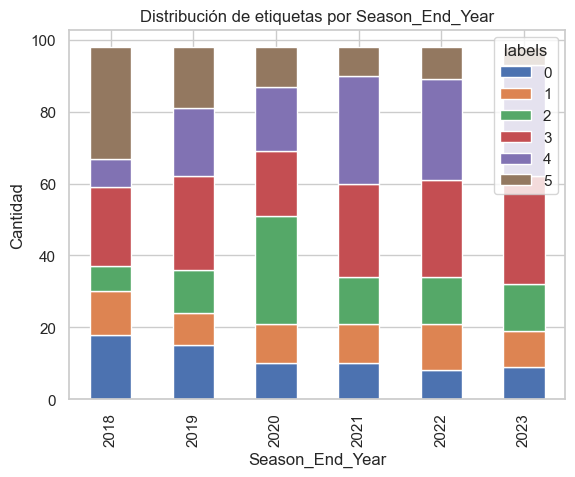

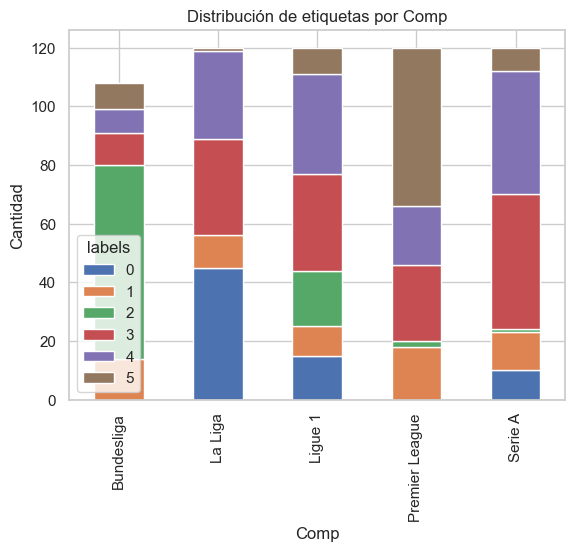

In [32]:
# Añade las etiquetas al dataframe original para la visualización
Data_Teams_4['labels'] = labels

for var in ['Season_End_Year', 'Comp']:
    ct = pd.crosstab(Data_Teams_4[var], Data_Teams_4['labels'])
    ct.plot.bar(stacked=True)
    plt.title('Distribución de etiquetas por ' + var)
    plt.ylabel('Cantidad')
    plt.show()

In [33]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_4_scaled)

# Preparar el DataFrame para la visualización
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = Data_Teams_4['Cluster - GMM']
df_pca['Comp'] = Data_Teams_4['Comp']
df_pca['Season_End_Year'] = Data_Teams_4['Season_End_Year']
df_pca['Squad'] = Data_Teams_4['Squad']

# Crear el gráfico interactivo utilizando la misma paleta de colores
fig = px.scatter(df_pca, x='PC1', y='PC2', color='Cluster', hover_data=['Comp', 'Season_End_Year', 'Squad'],
                 title='PCA Projection of Hierarchical Clustering Results', color_continuous_scale=px.colors.qualitative.T10)
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig.show()